## You may remember one of our quiz problems in your initial application:

What are the number of routes to get from the top left corner to the bottom right corner. You are only allowed to travel on a line and have two - different moves available: right or down. One possible route is given in red below.

![Lattice Paths](https://github.com/Explore-AI/Pictures/blob/master/lattice.png?raw=true)

```A:  1,024
B: 11,250	
C: 12,870
D: 25,600```

# [Lattice Paths](https://projecteuler.net/problem=15)

This is the same problem as one of Project Euler's problems. Starting in the top left corner of a 2×2 grid, and only being able to move to the right and down, there are exactly 6 routes to the bottom right corner.

![Euler_Lattice](http://github.com/Explore-AI/Pictures/blob/master/p015.gif?raw=true)

How many such routes are there through a 20×20 grid? 

In our quiz we gave you an 8 x 8, and in the tutorial that follows we will show how you can build python code to solve this problem for a grid of **any** size - using three different algorithms. Neither of these solutions is the *best* as they all differ in the amount of time and space complexity they exhibit.

This tutorial is based off Project Euler problem 15: [Lattice Paths](https://projecteuler.net/problem=15). The full overview can be found here: [Overview](https://projecteuler.net/overview=015)

# Proposed Solution

In [22]:
# import the required libraries
import numpy as np   
import pandas as pd
%matplotlib inline

## Iterative Solution

The most basic iterative solution involves using a bottom-up programming technique called dynamic programming. Instead of starting from $n = 20$ and $m = 20$ and working our way
down, we can start from the bottom “base cases” and work our way up, saving the results in a
two-dimensional array (which we’ll denote via $“grid”$) where $grid[i][j]$ corresponds to the result
`count_routes(i, j)`.

A “base case” is typically the simplest case from the starting point. For us, that’s any time m or n equals 0, for which the result is always 1 (i.e. there is only one way to get there). So we initialize all $grid[i][0]$ and $grid[0][j]$ to 1 and then iterate across all $i ≤ m$ and $j ≤ n$ to calculate each result, storing the results in the array as we go. At the very end, $grid[m][n]$ will have the desired answer.

In [2]:
def count_routes_iterative(m, n):
    grid = np.ndarray((m+1, n+1))
    
    for i in range(m+1):
        grid[i][0] = 1
    
    for j in range(n+1):
        grid[0][j] = 1
        
    for i in range(1, m + 1):
        for j in range(1, n + 1):
            grid[i][j] = grid[i-1][j] +grid[i][j-1]  #DB why we use this step is unclear          
    
    return grid[m][n]
    

In [3]:
count_routes_iterative(2, 2)

6.0

In [4]:
count_routes_iterative(8, 8)

12870.0

Whew! We got one of the answers on the quiz!

In [5]:
count_routes_iterative(20, 20)

137846528820.0

## Recursive Implementation

We could also get to the answer recursively - starting at the end and working our way to the start. By inspection, the number of routes from (0, 0) to (m, n) is equal to the number of routes from (0, 0) to (m − 1, n) plus the number of routes from (0, 0) to (m, n − 1). This implies a very simple recursive algorithm:

In [6]:
def count_routes_recursive(m, n):    
    if (n == 0) | (m == 0):
        return 1    
    
    return count_routes_recursive(m, n - 1) + count_routes_recursive(m - 1, n)

In [7]:
count_routes_recursive(2, 2)

6

In [8]:
count_routes_recursive(8, 8)

12870

In [9]:
# only for the brave! take out the comment below if you want to see if this works?
# count_routes_recursive(20, 20)

However, it is too slow to give the answer in reasonable time: consider that count_routes_recursive(20, 20)
calls count_routes_recursive(20, 19) and count_routes_recursive(19, 20). The former calls count_routes_recursive(20, 18)
and count_routes_recursive(19, 19), while the latter calls count_routes_recursive(19, 19) and count_routes_recursive(18, 20). 

Notice how count_routes_recursive(19, 19) is present in both of those branches two levels down from the
top. Our algorithm is recomputing the same results multiple times. This problem only gets worse
as we delve deeper into the recursion. This can be avoided by using memoization, a top-down
programming technique of caching results for later use. This way each result is only calculated
once.

In [10]:
def count_routes_recursive_lookup(m,n, cache={}):
    if (n == 0) | (m == 0):
        return  1
    try:
        return cache[(m, n)]
    
    except KeyError:                      # this will catch any result that hasnt been calculated before
        cache[(m, n)] =   count_routes_recursive_lookup(m, n-1, cache) \
                        + count_routes_recursive_lookup(m-1, n, cache)
        return cache[(m, n)]


In [11]:
count_routes_recursive_lookup(2,2)

6

In [12]:
count_routes_recursive_lookup(8,8)

12870

In [13]:
count_routes_recursive_lookup(20,20)

137846528820

Notice that the cache-lookup code comes after the 0-check for m and n. These two pieces could
technically go in either order and work just fine for our purposes, but there’s really no need to
spend time/resources performing a dictionary lookup if we can “quit” early.

While the memoized recursion may be suitable for the purposes of the problem, memoized recursion
often requires more memory, and some languages have trouble with deeply-nested recursive
calls.

## Combinatorial Solution
However, these solutions are both O(mn), and we can do better using combinatorics. In a grid of
size m by n, we know that no matter what path we take, there will be exactly $m$ movements to the
right (R) and $n$ movements down (D). This means the pathway can be represented as a string of
R’s and D’s of length $m + n$.

How many ways can we allocate $m$ R’s and $n$ D’s in such a string? Note that for a single configuration, once we place the the R’s we immediately know where the D’s must go (as they cannot go
anywhere else). All we really have to know is how many ways we can place the R’s. The number
of ways we can do this, mathematically, is denoted with the binomial coefficient $^{m+n}C_{m}$.

This is called a combination, the number of ways of choosing k items from a group of n items where
the order of the k items does not matter <br> $^{n}C_{k} = \frac{n!}{k!(n-k)!} = \frac{n(n-1)...(n-k-1)}{k!}$

Using this formula, we can calculate m+n $^{m+n}C_{m}$ for general $m$ and $n$, but seeing as our grid is a perfect square $(m=n)$:
$^{2n}C_{n} = \frac{2n(2n-1)...(n+2)(n+1)}{n(n-1)...\times 2 \times 1} = \prod^{n}_{i=1}\frac{n+i}{i}$.

This gives us a much faster O(n) solution:

In [14]:
def count_routes_combin(n):
    result = 1
    
    for i in range(n):
        result = result * (n+i+1) / (i+1)
    
    return result

In [15]:
count_routes_combin(2)

6.0

In [16]:
count_routes_combin(20)

137846528820.0

# Algortihmic Complexity Demonstration

Let's test to see if this does indeed scale as expected...

In [23]:
number = [2, 5, 10, 20, 50]
output = []
for n in number:
    out_combin    = %timeit -o -q count_routes_combin(n)
    out_iter      = %timeit -o -q count_routes_iterative(n, n)
    out_recur_lu  = %timeit -o -q count_routes_recursive_lookup(n, n) 
    if n <= 10:
        out_recur = %timeit -o -q count_routes_recursive(n, n) 
    else:
        out_recur = None
    output.append([n, out_combin.best, out_iter.best,out_recur_lu.best, out_recur.best if n <= 10 else None])

In [24]:
output = pd.DataFrame(output, columns=['Grid Size', 'Combinations', 'Iterative', 'Recursive Lookup', 'Recursive'])
output.set_index('Grid Size', inplace=True)

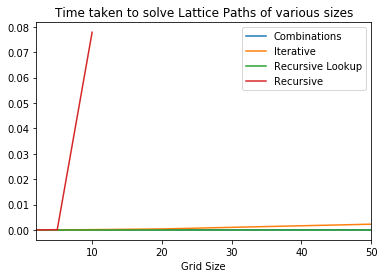

In [25]:
output.plot(title='Time taken to solve Lattice Paths of various sizes')

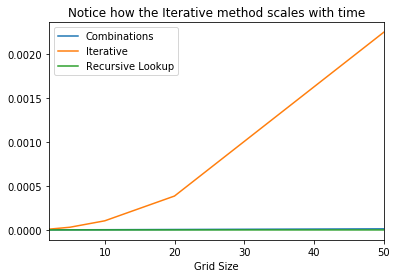

In [26]:
output[['Combinations', 'Iterative', 'Recursive Lookup']].plot(title='Notice how the Iterative method scales with time')